In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%pylab inline

Populating the interactive namespace from numpy and matplotlib


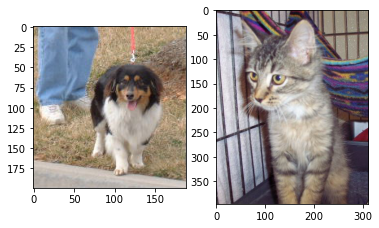

In [2]:
img_Dog = mpimg.imread('./train/Dog/2.jpg')
img_Cat = mpimg.imread("./train/Cat/2.jpg")

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(img_Dog)
ax2.imshow(img_Cat)

plt.show()

In [3]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet' , include_top = False , 
                  input_shape=(96,96,3))

In [4]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0     

In [5]:
for layer in base_model.layers:
    layer.trainable = False

In [6]:
last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output
x = keras.layers.Flatten()(last_output)
x = keras.layers.Dense(64, activation='relu', name='FC_1')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(2, activation='sigmoid', name='sigmoid')(x)

In [7]:
VGG16_model = keras.Model(inputs = base_model.input, outputs = x)

In [8]:
VGG16_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)      

In [9]:
VGG16_model.compile(optimizer=keras.optimizers.Adam(),loss = 'binary_crossentropy', metrics=["accuracy"])

In [10]:
import tensorflow as tf
from tensorflow import keras

train_path = './train'
test_path = './test'

train_images = keras.preprocessing.image.ImageDataGenerator().flow_from_directory(train_path,
                        target_size=(96,96),
                        batch_size=10)
test_images = keras.preprocessing.image.ImageDataGenerator().flow_from_directory(test_path,
                        target_size=(96,96),
                        batch_size=30)

Found 23975 images belonging to 2 classes.
Found 8977 images belonging to 2 classes.


In [11]:
history = VGG16_model.fit(train_images, validation_data = test_images,
                           epochs = 5 , steps_per_epoch=10)

Epoch 1/5
10/10 [==============================] - 297s 30s/step - loss: 0.8310 - accuracy: 0.6700 - val_loss: 0.8465 - val_accuracy: 0.8046
Epoch 2/5
10/10 [==============================] - 298s 30s/step - loss: 0.4949 - accuracy: 0.8400 - val_loss: 0.6044 - val_accuracy: 0.8267
Epoch 3/5
10/10 [==============================] - 296s 30s/step - loss: 0.4685 - accuracy: 0.8200 - val_loss: 0.4657 - val_accuracy: 0.8560
Epoch 4/5
10/10 [==============================] - 298s 30s/step - loss: 0.4224 - accuracy: 0.8500 - val_loss: 0.3924 - val_accuracy: 0.8708
Epoch 5/5
10/10 [==============================] - 299s 30s/step - loss: 0.5392 - accuracy: 0.7900 - val_loss: 0.3584 - val_accuracy: 0.8766


In [12]:
history = VGG16_model.fit(train_images, validation_data = test_images,
                           epochs = 5 , steps_per_epoch=10)

Epoch 1/5
10/10 [==============================] - 304s 30s/step - loss: 0.4738 - accuracy: 0.7700 - val_loss: 0.3292 - val_accuracy: 0.8778
Epoch 2/5
10/10 [==============================] - 304s 30s/step - loss: 0.4153 - accuracy: 0.8300 - val_loss: 0.3371 - val_accuracy: 0.8732
Epoch 3/5
10/10 [==============================] - 306s 31s/step - loss: 0.3948 - accuracy: 0.8400 - val_loss: 0.3109 - val_accuracy: 0.8784
Epoch 4/5
10/10 [==============================] - 300s 30s/step - loss: 0.4204 - accuracy: 0.8200 - val_loss: 0.3006 - val_accuracy: 0.8814
Epoch 5/5
10/10 [==============================] - 291s 29s/step - loss: 0.6355 - accuracy: 0.7800 - val_loss: 0.2979 - val_accuracy: 0.8831


In [13]:
history = VGG16_model.fit(train_images, validation_data = test_images,
                           epochs = 5 , steps_per_epoch=10)

Epoch 1/5
10/10 [==============================] - 290s 29s/step - loss: 0.4267 - accuracy: 0.8100 - val_loss: 0.2905 - val_accuracy: 0.8877
Epoch 2/5
10/10 [==============================] - 297s 30s/step - loss: 0.5026 - accuracy: 0.8200 - val_loss: 0.2863 - val_accuracy: 0.8852
Epoch 3/5
10/10 [==============================] - 308s 31s/step - loss: 0.3417 - accuracy: 0.8100 - val_loss: 0.2790 - val_accuracy: 0.8868
Epoch 4/5
10/10 [==============================] - 304s 30s/step - loss: 0.4446 - accuracy: 0.8300 - val_loss: 0.2670 - val_accuracy: 0.8901
Epoch 5/5
10/10 [==============================] - 313s 31s/step - loss: 0.3227 - accuracy: 0.8400 - val_loss: 0.2595 - val_accuracy: 0.8927


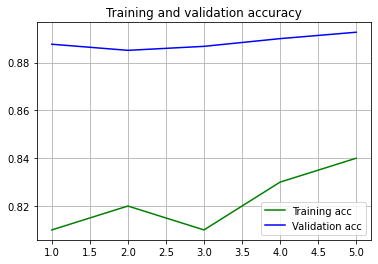

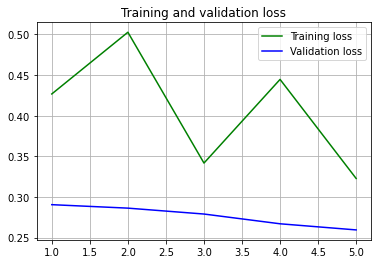

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid(True)
plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid(True)
plt.show()